# Plot of the results

In [1]:
# Load packages
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pyreadr
import seaborn as sns

from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.misc.loader import read_csv

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

from matplotlib import colors as mcolors
COLORS = [v for v in mcolors.BASE_COLORS.values()]

readRDS = robjects.r['readRDS']

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

COLORS = ["#377eb8", "#ff7f00", "#4daf4a",
          "#f781bf", "#a65628", "#984ea3",
          "#999999", "#e41a1c", "#dede00", "#000000"]
custom_palette = sns.set_palette(sns.color_palette(COLORS))

In [2]:
# Canada map
canada = './data/Canada/Canada_AL263.shp'
map_df = gpd.read_file(canada)

# Cities / Region
city = read_csv('./data/canadian_temperature_daily.csv').values[:, 0]
location = pd.read_csv('./data/canadian_location.csv')
region = pd.read_csv('./data/canadian_region.csv')
location['Name'] = city
location['Region'] = region

In [3]:
# True labels
le = LabelEncoder()
le.fit(np.array(region.loc[:, 'data.region']))
true_labels = le.transform(np.array(region.loc[:, 'data.region']))

In [4]:
# fCUBT
with open('./results/results_weather_fcubt.pkl', 'rb') as f:
    results_fcubt = pickle.load(f)

In [5]:
# Growing
with open('./results/results_weather_growing.pkl', 'rb') as f:
    results_growing = pickle.load(f)

In [6]:
# FPCA+GMM
with open('./results/results_weather_FPCA_GMM.pkl', 'rb') as f:
    results_fpca_gmm_all = pickle.load(f)
results_fpca_gmm = results_fpca_gmm_all[7]['labels'] # BEST BIC

In [7]:
# FunHDDC
results_funhddc = readRDS('./results/results_weather_funhddc.rds')
results_funhddc = pandas2ri.rpy2py_intvector(results_funhddc)

In [8]:
# Funclust
results_funclust = readRDS('./results/results_weather_funclust.rds')
results_funclust = pandas2ri.rpy2py_intvector(results_funclust)

In [9]:
# k-means-D1
with open('./results/results_weather_kmeans_d1.pkl', 'rb') as f:
    results_kmean_d1 = pickle.load(f)
results_kmean_d1 = results_kmean_d1[3] # Best ARI

In [10]:
# k-means-D2
with open('./results/results_weather_kmeans_d2.pkl', 'rb') as f:
    results_kmean_d2 = pickle.load(f)
results_kmean_d2 = results_kmean_d2[3] # Best ARI

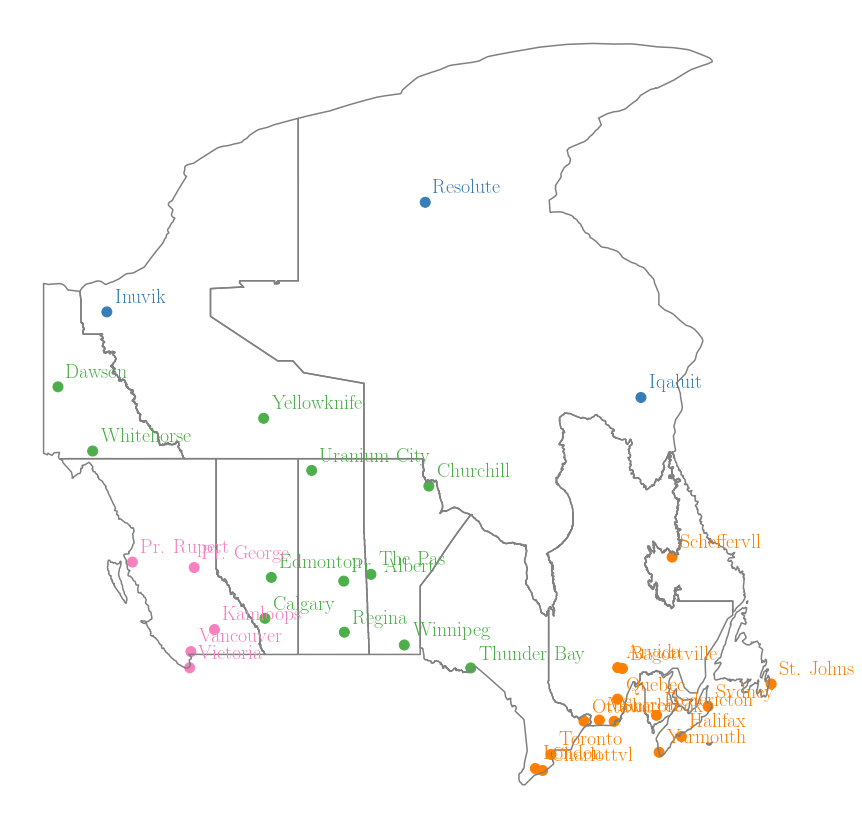

In [11]:
# TRUE
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label)] for label in true_labels], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(true_labels[idx])],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_true.pdf', bbox_inches='tight', pad_inches=0.05)

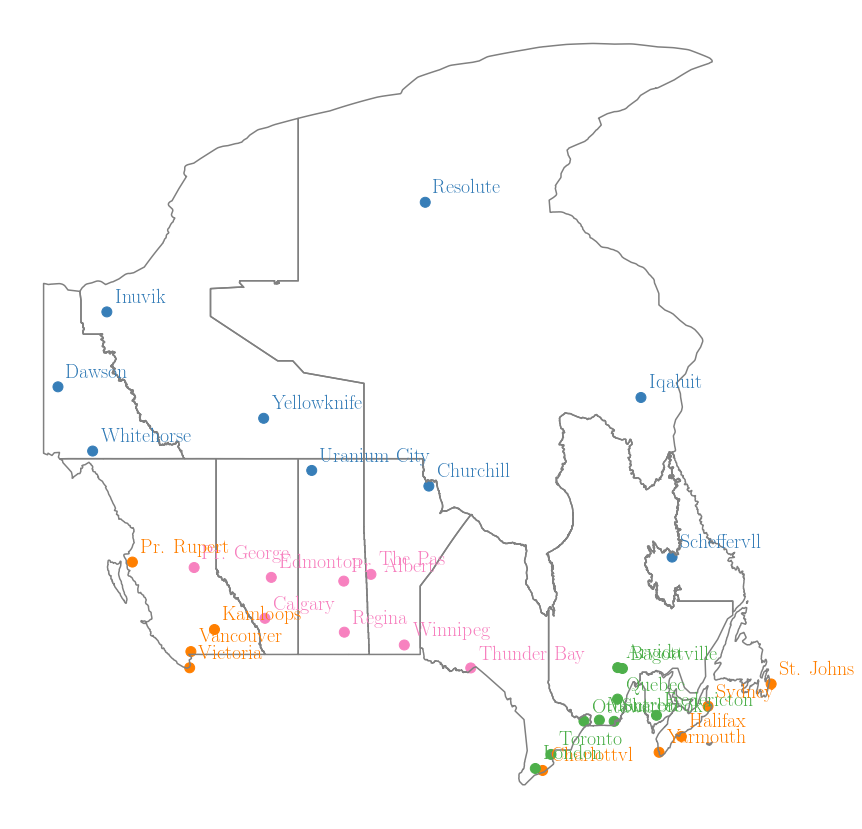

In [12]:
# FCUBT
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label)] for label in results_fcubt], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_fcubt[idx])],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_fcubt.pdf', bbox_inches='tight', pad_inches=0.05)

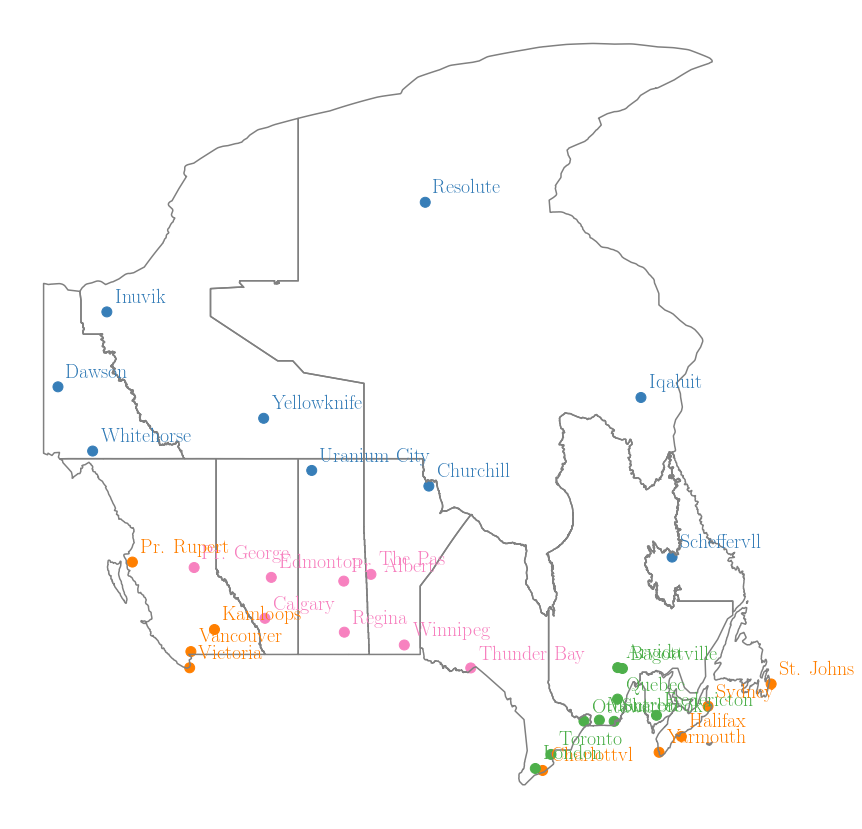

In [13]:
# Growing
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label)] for label in results_growing], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_growing[idx])],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_growing.pdf', bbox_inches='tight', pad_inches=0.05)

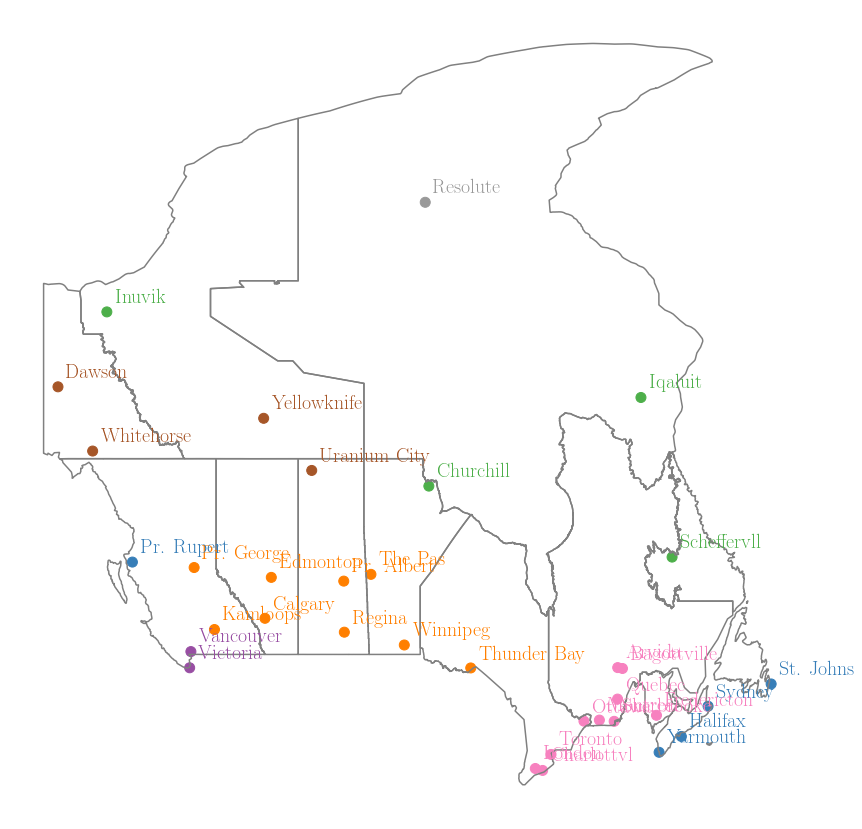

In [14]:
# FPCA_GMM
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label)] for label in results_fpca_gmm], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_fpca_gmm[idx])],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_fpca_gmm.pdf', bbox_inches='tight', pad_inches=0.05)

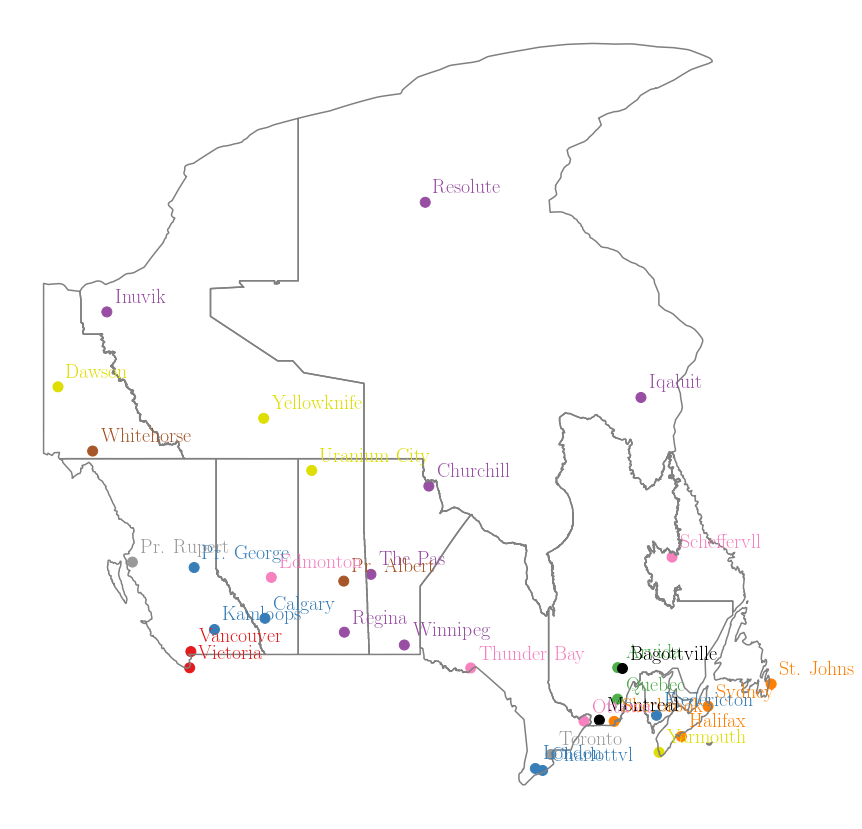

In [15]:
# FunHDDC
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label) - 1] for label in results_funhddc], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_funhddc[idx] - 1)],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_funhddc.pdf', bbox_inches='tight', pad_inches=0.05)

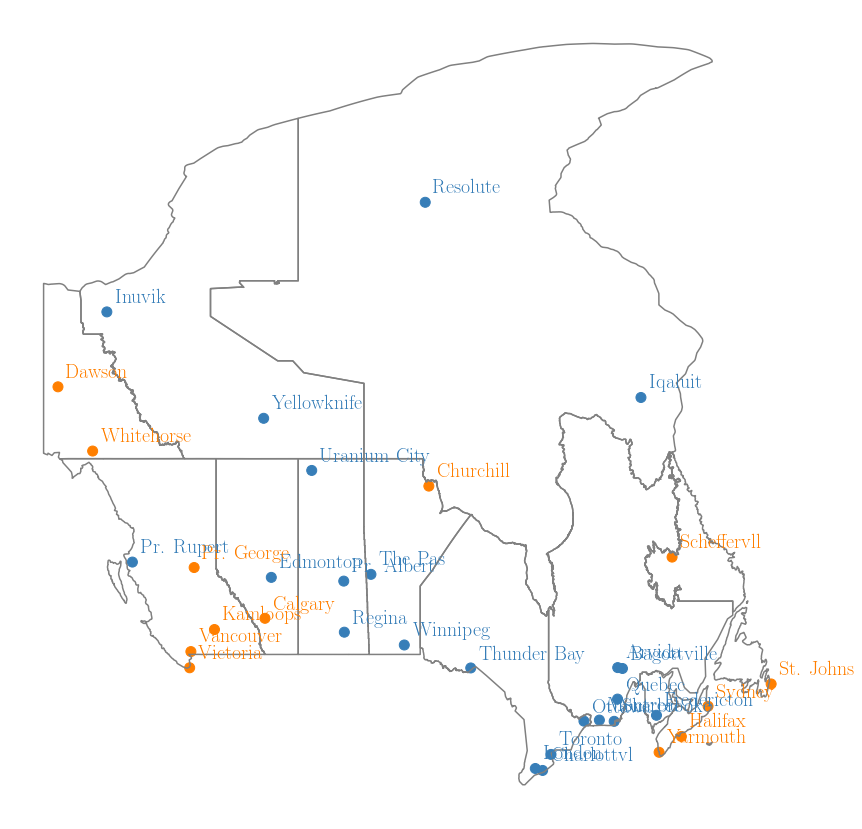

In [16]:
# Funclust
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label) - 1] for label in results_funclust], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_funclust[idx] - 1)],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_funclust.pdf', bbox_inches='tight', pad_inches=0.05)

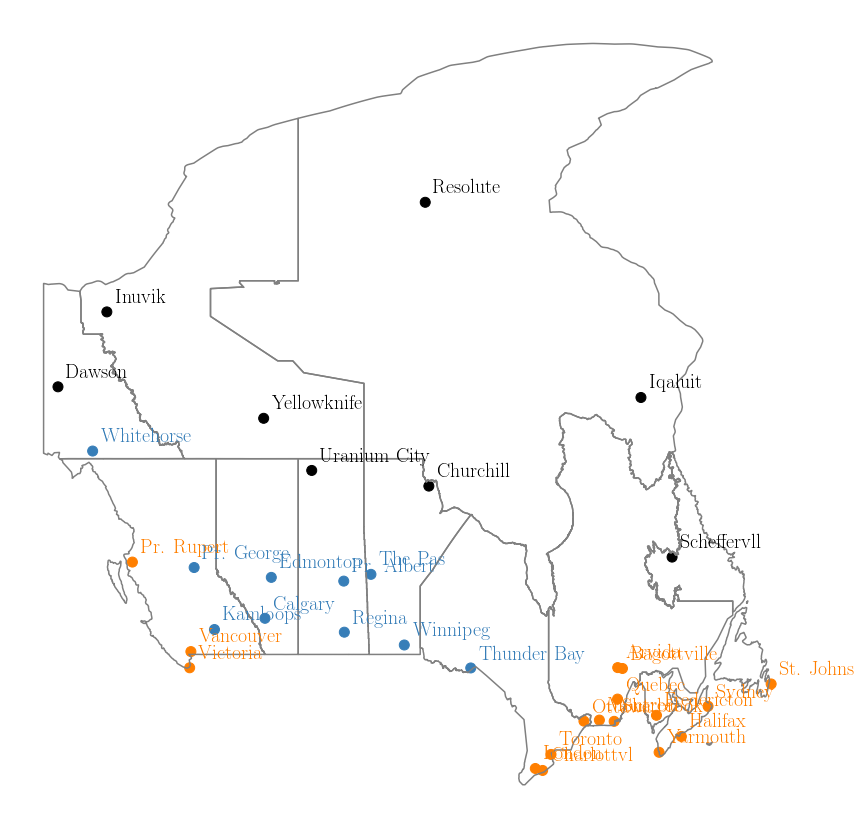

In [17]:
# k-means-d1
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label) - 1] for label in results_kmean_d1], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_kmean_d1[idx] - 1)],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_kmean_d1.pdf', bbox_inches='tight', pad_inches=0.05)

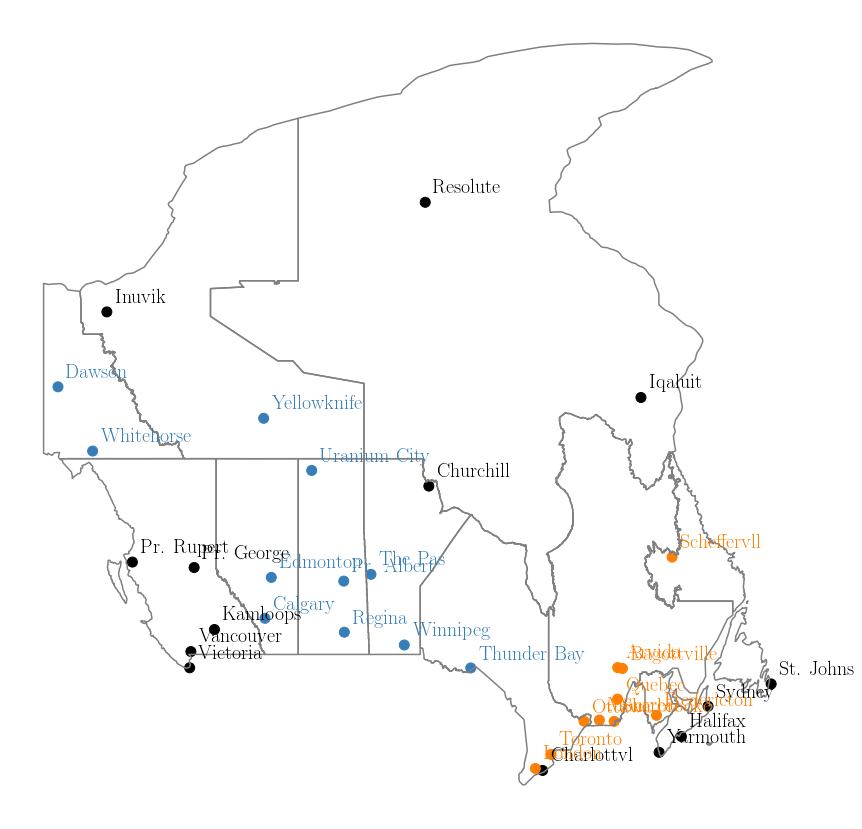

In [18]:
# k-means-d2
map_df.boundary.plot(figsize=(15, 15), color='grey')
_ = plt.scatter(-location['W.longitude'], location['N.latitude'],
                c=[COLORS[int(label) - 1] for label in results_kmean_d2], s=100)
for idx, name in enumerate(location['Name']):
    _ = plt.annotate(name, (-location.loc[idx, 'W.longitude'] + 1, location.loc[idx, 'N.latitude'] + 0.5),
                    c=COLORS[int(results_kmean_d2[idx] - 1)],
                    size=20)
_ = plt.axis('off')
plt.savefig('./figures/results_weather_kmean_d2.pdf', bbox_inches='tight', pad_inches=0.05)